<a href="https://colab.research.google.com/github/Preetitamrakar-phd/Internship-At-The-Sparks-Foundation-/blob/main/Task6_PredictionUsingDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21**


**Preeti Tamrakar**

**TASK #6**

**To Do:** Create the Decision Tree classifier and visualize it graphically. if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [1]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [3]:
iris = pd.read_csv("Iris.csv")


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# removing the column "Id"
iris = iris.drop(['Id'],axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Checking the shape of the matches dataset
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# number of unique values in Species column
iris.Species.nunique()

3

In [9]:
# Actual uniue values in Species column
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Spliting the dataset into dependent and independent variables

In [10]:
X = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# splitting into training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Training the decision tree with the training dataset
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("success")

success


In [14]:
y_pred = dt.predict(X_test)
y_pred

array([1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1])

In [15]:
# Comparing Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,1,1
1,2,2
2,1,1
3,1,1
4,1,1


In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusin matrix: \n" + str(cm))
print("Tha accuracy is:" + str(accuracy_score(y_test, y_pred)))

Confusin matrix: 
[[10  0  0]
 [ 0 13  1]
 [ 0  2 12]]
Tha accuracy is:0.9210526315789473


**Visualizing the Decision Tree**

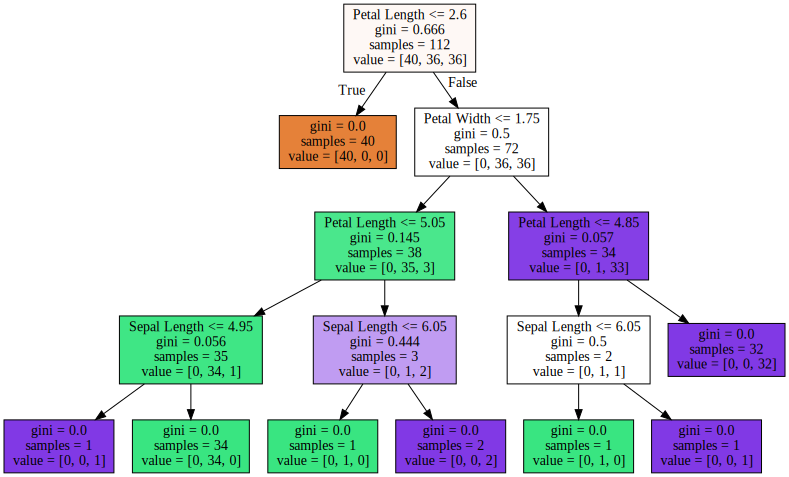

In [17]:
#conda install python-graphviz   # if you are running this code in jupyter notebook, you need to install conda.
# If you are using Google Colab, then there is no need to install this package.

import graphviz 
from sklearn import tree
f = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
c =  ['Setosa', 'Versicolor', 'Virginica']
d = tree.export_graphviz(dt, feature_names = f, filled=True)
dtree = graphviz.Source(d, format="png") 
dtree

**One can now feed any new data to this classifer and it would be able to predict the right class accordingly.**

**Thank you!!!**